In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)

df = pd.DataFrame()

In [36]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [37]:
df['x'] = X.reshape(100)
df["y"] = y

In [38]:
df

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


In [40]:
df["pred1"] = df["y"].mean()
pred1 = df["y"].mean()
pred1

0.26545839669679816

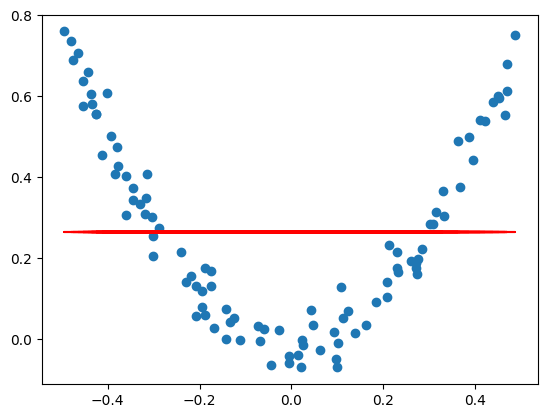

In [41]:
plt.scatter(df["x"], df["y"])
plt.plot(df["x"], df["pred1"], color="red")

In [42]:
df['res1'] = df['y'] - df['pred1']

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [44]:
dt1 = DecisionTreeRegressor(max_leaf_nodes=8)
dt1.fit(df["x"].values.reshape(100, 1), df["res1"].values)


DecisionTreeRegressor(max_leaf_nodes=8)

In [45]:
df

,x,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


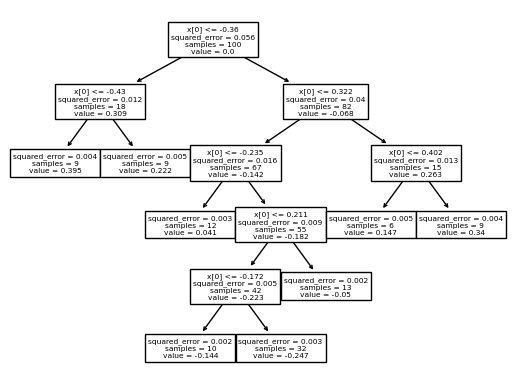

In [46]:
plot_tree(dt1)
plt.show()

In [47]:
df["pred2"] = pred1 + 0.1 * dt1.predict(df["x"].values.reshape(100, 1))

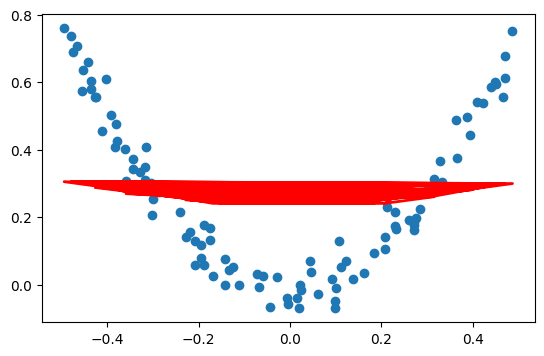

In [49]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.plot(df["x"], df["pred2"], linewidth=2, color="red")
plt.scatter(df["x"], df["y"])